In [10]:
import numpy as np 
import pandas as pd 
import statsmodels.api as sm 
import matplotlib.pyplot as plt # para visualizaciones

from sklearn import datasets # datasets disponibles en sklearn 
data = datasets.load_boston() # carga del dataset BOSTON 

# Informacion del dataset 
print(data.DESCR)

# Variables independientes (entrada) 
df = pd.DataFrame(data.data, columns=data.feature_names)

# y = Valor medio de casas ocupadas por sus propietarios en 1000 dolares.
# X1 = CRIM: representa el crimen per c ́apita por ciudad.
# X2 = ZN: la proporci ́on de zonas residenciales en un  ́area determinada.
# X3 = INDUS: la proporci ́on de acres dedicada a negocios al por menor en la ciudad.
# X4 = CHAS: variable binaria (=1 si las v ́ıas cruzan el r ́ıo y 0 en otro caso).
# X5 = NOX: concentraci ́on de  ́oxido n ́ıtrico (partes por mill ́on).
# X6 = RM: n ́umero medio de habitaciones por vivienda.
# X7 = AGE: proporci ́on de edificios ocupados por sus propietarios, construidos antes de 1940.
# X8 = DIS: representa la distancia ponderada a cinco centros de empleo en Boston.
# X9 = RAD:  ́ındice de accesibilidad a las autopistas radiales.
# X10 = TAX: valor total de la tasa de impuestos por 10.000 d ́olares.
# X11 = PTRATIO: representa el ratio alumno-profesor por ciudad.
# X12 = B: valor definido como 1000(Bk - 0.63)^2 donde Bk es la proporcion de afroamericanos en la ciudad
# X13 = LSTAT: porcentaje de clase baja en la poblacion

# Variable de salida
target = pd.DataFrame(data.target, columns=["MEDV"])
y = target["MEDV"]

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [7]:
### Modelo con todas las variables
#X = df[["RM", "LSTAT"]]
X = df # todas las variables

# Train/Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

<AxesSubplot:>

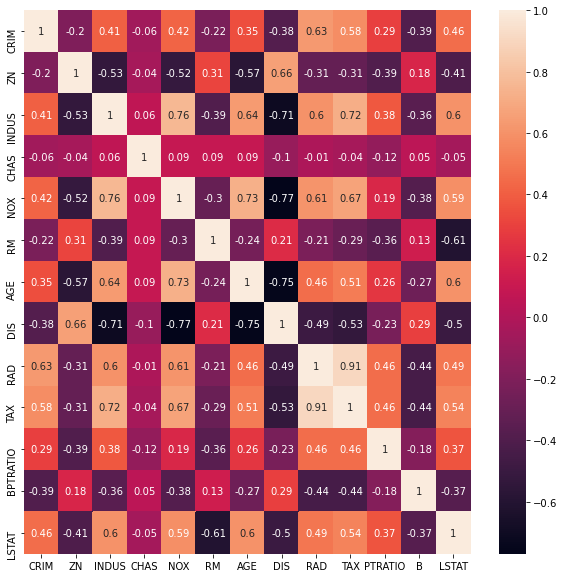

In [11]:
# Correlación
import seaborn as sns
correlation_matrix = df.corr().round(2)
plt.subplots(figsize=(10,10)) 
sns.heatmap(data=correlation_matrix, annot=True)

# Se puede ver como variables como NOX y DIS tienen una alta correlación (0.77) entre ellas, 
# por lo que no sería necesario que ambas aparezcan en el modelo.

In [12]:
# Para ver el resumen del modelo
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
# Se puede observar como el p-valor de las variables INDUS, NOX y AGE son claramente mayores que 0.05 
# por lo que no se rechaza H0 para ellas y por ello probablemente no influyan en la variable de salida. 
# Por este motivo se descartan del modelo y se construira con el resto de variables.

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              891.3
Date:                Wed, 31 Mar 2021   Prob (F-statistic):                        0.00
Time:                        08:58:32   Log-Likelihood:                         -1523.8
No. Observations:                 506   AIC:                                      3074.
Df Residuals:                     493   BIC:                                      3128.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0929      0.034     -2.699      0.007      -0.161      -0.025
ZN             0.0487      0.014      3.382      0.001       0.020       0.077
INDUS         -0.0041      0.064     -0.063      0.950      -0.131       0.123
CHAS           2.8540      0.904      3.157      0.002       1.078       4.630
NOX           -2.8684      3.359     -0.854      0.394      -9.468       3.731
RM             5.9281      0.309     19.178      0.000       5.321       6.535
AGE           -0.0073      0.014     -0.526      0.599      -0.034       0.020
DIS           -0.9685      0.196     -4.951      0.000      -1.353      -0.584
RAD            0.1712      0.067      2.564      0.011       0.040       0.302
TAX           -0.0094      0.004     -2.395      0.017      -0.017      -0.002
PTRATIO       -0.3922      0.110     -3.570      0.000      -0.608      -0.176
B              0.0149      0.003      5.528      0.000       0.010       0.020
LSTAT         -0.4163      0.051     -8.197      0.000      -0.516      -0.317
==============================================================================
Omnibus:                      204.082   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1374.225
Skew:                           1.609   Prob(JB):                    3.90e-299
Kurtosis:                      10.404   Cond. No.                     8.50e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
# Se descartan INDUS, NOX, AGE
X = df.copy()
X.drop(['INDUS', 'NOX', 'AGE'], axis=1, inplace=True)

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

# Aparentemente ya todas las variables serían significativas. 
# Si se quisiesen ahora obtener las predicciones (falta de comprobar las hipótesis de regresión lineal)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1162.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):                        0.00
Time:                        09:01:25   Log-Likelihood:                         -1524.5
No. Observations:                 506   AIC:                                      3069.
Df Residuals:                     496   BIC:                                      3111.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0911      0.034     -2.655      0.008      -0.158      -0.024
ZN             0.0513      0.014      3.634      0.000       0.024       0.079
CHAS           2.7185      0.891      3.049      0.002       0.967       4.470
RM             5.7145      0.245     23.368      0.000       5.234       6.195
DIS           -0.8666      0.167     -5.187      0.000      -1.195      -0.538
RAD            0.1828      0.064      2.878      0.004       0.058       0.308
TAX           -0.0109      0.003     -3.296      0.001      -0.017      -0.004
PTRATIO       -0.4002      0.109     -3.681      0.000      -0.614      -0.187
B              0.0145      0.003      5.442      0.000       0.009       0.020
LSTAT         -0.4492      0.042    -10.575      0.000      -0.533      -0.366
==============================================================================
Omnibus:                      198.045   Durbin-Watson:                   0.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1250.213
Skew:                           1.575   Prob(JB):                    3.31e-272
Kurtosis:                      10.027   Cond. No.                     2.24e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# predicciones de la salida
y_pred = model.predict(X_test)

# Metricas de evaluacion
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)

# modelo que como tal no da una generalización demasiado buena.
# Habría que investigar más el efecto de las variables en el modelo para evaluar cuales son las realmente relevantes.

r2:  0.5979678541641065 mae:  32.73685008812266


In [15]:
### Modelo con scikit-learn

# Feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train.values.reshape(-1, 1))

# Modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediccion de valores
y_pred = regressor.predict(X_test)
y_pred = sc_y.inverse_transform(y_pred)
y_test = y_test.values.reshape(-1, 1)

# Metricas de evaluacion
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, y_pred)
mae = mean_squared_error(y_test, y_pred)
print("r2: ", r2, "mae: ", mae)

r2:  0.5632013220214089 mae:  35.56783453209787
